In [333]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [334]:
data = pd.read_csv('customer_segmentation.csv')
data2 = data
data3 = data
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [335]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 919.2+ KB


In [336]:
data = data.drop(columns=['ID', 'Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 
                          'Var_1', 'Segmentation'])
data2 = data2.drop(columns=['ID', 'Family_Size', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 
                          'Var_1', 'Segmentation'])
data3 = data3.drop(columns=['ID', 'Gender', 'Family_Size', 'Graduated', 'Profession', 'Spending_Score', 
                          'Var_1', 'Segmentation'])

In [337]:
data.isnull().sum()

Age                   0
Work_Experience    1098
Family_Size         448
dtype: int64

In [338]:
data_cleaned = data.dropna(inplace=True)
data.isnull().sum()

Age                0
Work_Experience    0
Family_Size        0
dtype: int64

In [339]:
data.duplicated()

0        False
2        False
3        False
5        False
6        False
         ...  
10689     True
10690     True
10691     True
10693     True
10694     True
Length: 9236, dtype: bool

In [340]:
data_cleaned = data.drop_duplicates(inplace=True)

In [341]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [342]:
inertia_values = []
silhouette_scores = []
K_range = range(2, 11) 

for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=42)
    kmeans.fit(data_scaled)
    # print(kmeans.labels_)
    # break
    # Inertia (within-cluster sum of squares)
    inertia_values.append(kmeans.inertia_)
    
    # Silhouette Score
    silhouette = silhouette_score(data_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette)

inertia_values


[5103.69019613274,
 3539.651877830622,
 2805.2787303922305,
 2409.4560704282335,
 2146.2131441491874,
 1953.7444238184225,
 1701.483465531468,
 1560.9360220950657,
 1462.7948894951705]

In [343]:
len(kmeans.labels_)

2347

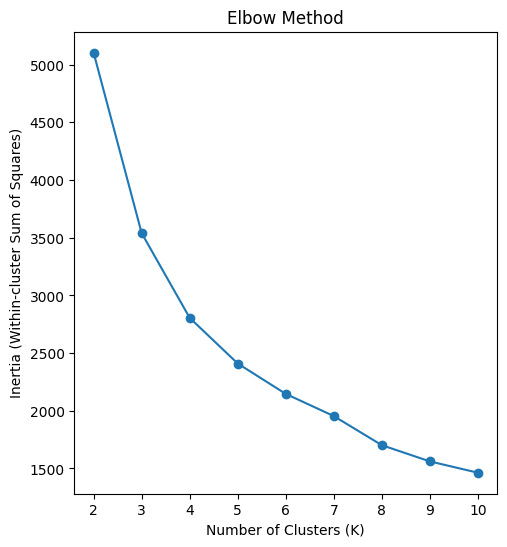

In [344]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.title('Elbow Method')
plt.show()

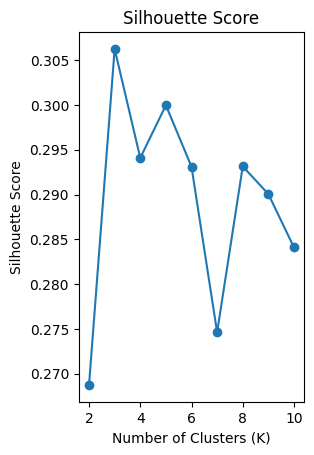

In [345]:
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

In [346]:
# Find the K value from the Elbow Method
elbow_K = 3  # Replace with the K value where you observe the "elbow" in the plot

# Find the K value from the Silhouette Score
silhouette_K = 4  # Replace with the K value that maximizes the Silhouette Score

# Print the selected K values
print(f"Selected K value from Elbow Method: {elbow_K}")
print(f"Selected K value from Silhouette Score: {silhouette_K}")


Selected K value from Elbow Method: 3
Selected K value from Silhouette Score: 4


In [347]:
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)
data['Cluster'].value_counts()

Cluster
3    728
0    620
2    524
1    475
Name: count, dtype: int64

In [348]:
data.head()

,Age,Work_Experience,Family_Size,Cluster
0,22,1.0,4.0,0
2,67,1.0,1.0,2
3,67,0.0,2.0,2
5,56,0.0,2.0,2
6,32,1.0,3.0,0


Text(0.5, 1.0, 'K-means Clustering')

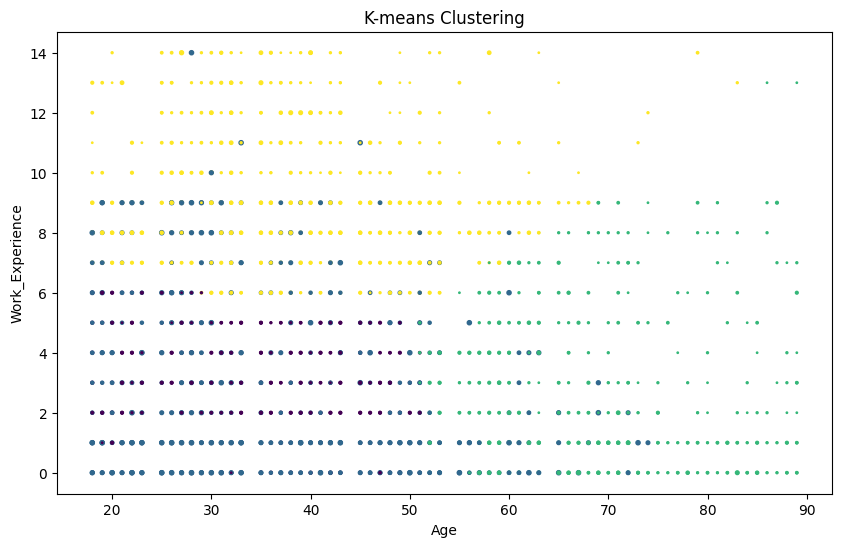

In [349]:
# Visualize and Interpret the Clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['Work_Experience'],data['Family_Size'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Work_Experience')
plt.title('K-means Clustering')

# Data2 Gender


In [350]:
data2.isnull().sum()

Gender                0
Age                   0
Work_Experience    1098
dtype: int64

In [351]:
data2_cleaned = data2.dropna(inplace=True)
data2.isnull().value_counts()

Gender  Age    Work_Experience
False   False  False              9597
Name: count, dtype: int64

In [352]:
data2.duplicated().value_counts()

True     8390
False    1207
Name: count, dtype: int64

In [353]:
data_cleaned = data2.drop_duplicates(inplace=True)

In [354]:
data2.head()

,Gender,Age,Work_Experience
0,Male,22,1.0
2,Female,67,1.0
3,Male,67,0.0
5,Male,56,0.0
6,Male,32,1.0


In [355]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data2['Gender'] = label_encoder.fit_transform(data2['Gender'])

In [356]:
data_scaled2 = scaler.fit_transform(data2)

In [357]:
inertia_values = []
silhouette_scores = []
K_range = range(2, 11) 

for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=42)
    kmeans.fit(data_scaled2)
    # print(kmeans.labels_)
    # break
    # Inertia (within-cluster sum of squares)
    inertia_values.append(kmeans.inertia_)
    
    # Silhouette Score
    silhouette = silhouette_score(data_scaled2, kmeans.labels_)
    silhouette_scores.append(silhouette)

inertia_values

[2620.1862417628527,
 1855.7518813945385,
 1396.4968190509321,
 1114.6803976554245,
 978.5224011397539,
 735.5472443036336,
 652.9718213977031,
 588.1794188355975,
 503.2270348172784]

In [358]:
len(kmeans.labels_)

1207

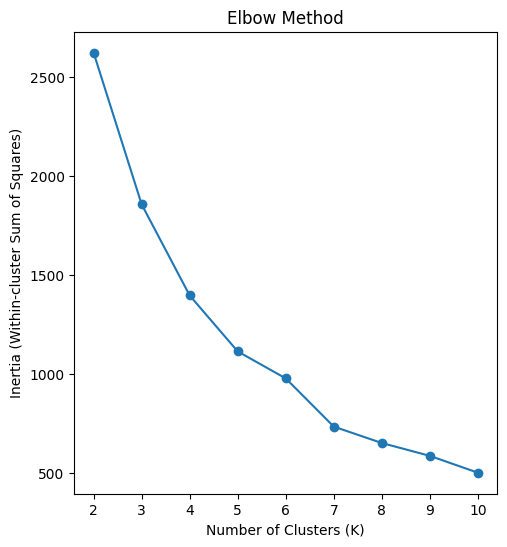

In [359]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.title('Elbow Method')
plt.show()

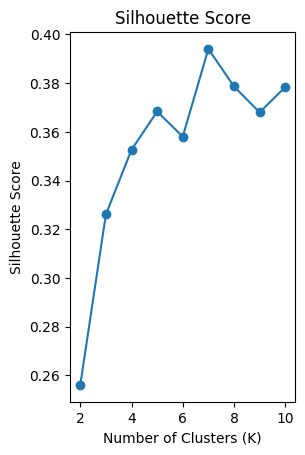

In [360]:
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

In [361]:
bow_K = 3  # Replace with the K value where you observe the "elbow" in the plot

# Find the K value from the Silhouette Score
silhouette_K = 4  # Replace with the K value that maximizes the Silhouette Score

# Print the selected K values
print(f"Selected K value from Elbow Method: {elbow_K}")
print(f"Selected K value from Silhouette Score: {silhouette_K}")

Selected K value from Elbow Method: 3
Selected K value from Silhouette Score: 4


In [372]:
kmeans = KMeans(n_clusters=6, random_state=42)
data2['Cluster'] = kmeans.fit_predict(data_scaled2)
data2['Cluster'].value_counts()

Cluster
0    250
4    234
3    215
1    201
2    195
5    112
Name: count, dtype: int64

In [373]:
data2.head()

,Gender,Age,Work_Experience,Cluster
0,1,22,1.0,3
2,0,67,1.0,0
3,1,67,0.0,2
5,1,56,0.0,2
6,1,32,1.0,3


Text(0.5, 1.0, 'K-means Clustering')

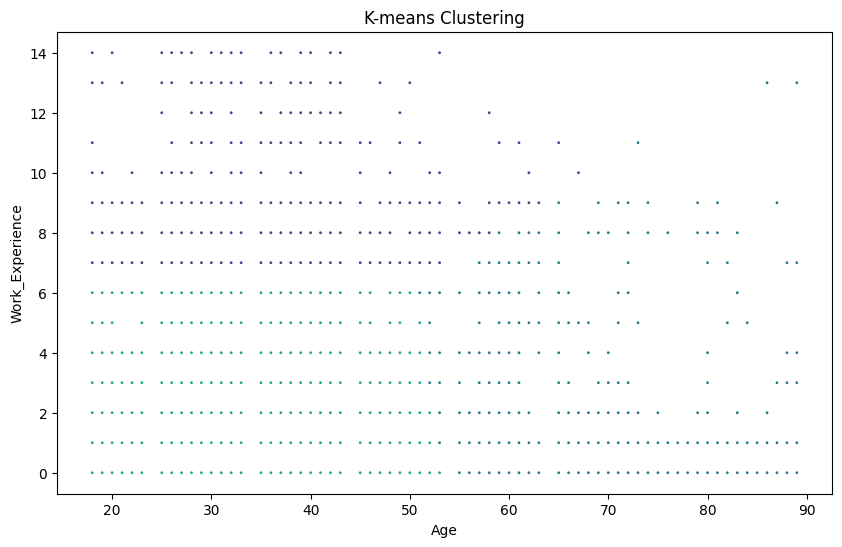

In [374]:
# Visualize and Interpret the Clusters
plt.figure(figsize=(10, 6))
plt.scatter(data2['Age'], data2['Work_Experience'],data2['Gender'], c=data2['Cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Work_Experience')
plt.title('K-means Clustering')

# Data3 Ever_Married


In [365]:
data3.isnull().sum()

Ever_Married        190
Age                   0
Work_Experience    1098
dtype: int64

In [366]:
data_cleaned = data3.dropna(inplace=True)
data3.isnull().value_counts()

Ever_Married  Age    Work_Experience
False         False  False              9436
Name: count, dtype: int64

In [378]:
data3.duplicated().value_counts()

False    1066
Name: count, dtype: int64

In [377]:
data_cleaned = data3.drop_duplicates(inplace=True)

In [368]:
data3.head()

,Ever_Married,Age,Work_Experience
0,No,22,1.0
2,Yes,67,1.0
3,Yes,67,0.0
5,Yes,56,0.0
6,No,32,1.0


In [379]:
data3['Ever_Married'] = label_encoder.fit_transform(data3['Ever_Married'])

In [380]:
data_scaled = scaler.fit_transform(data3)

In [381]:
inertia_values = []
silhouette_scores = []
K_range = range(2, 11) 

for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=42)
    kmeans.fit(data_scaled)
    # print(kmeans.labels_)
    # break
    # Inertia (within-cluster sum of squares)
    inertia_values.append(kmeans.inertia_)
    
    # Silhouette Score
    silhouette = silhouette_score(data_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette)

inertia_values

[2018.8542943195484,
 1472.9560527509868,
 1122.8558348202341,
 844.0322397871282,
 719.4080148984216,
 653.7088310076103,
 513.6565943924529,
 458.02712698559526,
 415.80368840771257]

In [382]:
len(kmeans.labels_)

1066

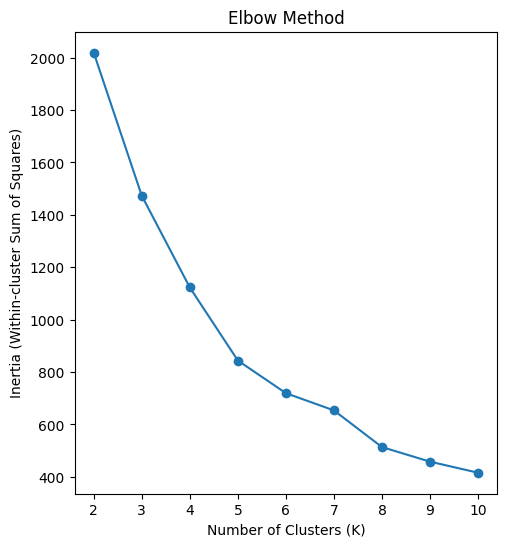

In [383]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.title('Elbow Method')
plt.show()

In [385]:
kmeans = KMeans(n_clusters=5, random_state=42)
data3['Cluster'] = kmeans.fit_predict(data_scaled)
data3['Cluster'].value_counts()

Cluster
0    252
3    219
1    203
2    199
4    193
Name: count, dtype: int64

In [386]:
data3.head()

,Ever_Married,Age,Work_Experience,Cluster
0,0,22,1.0,0
2,1,67,1.0,3
3,1,67,0.0,3
5,1,56,0.0,4
6,0,32,1.0,0


Text(0.5, 1.0, 'K-means Clustering')

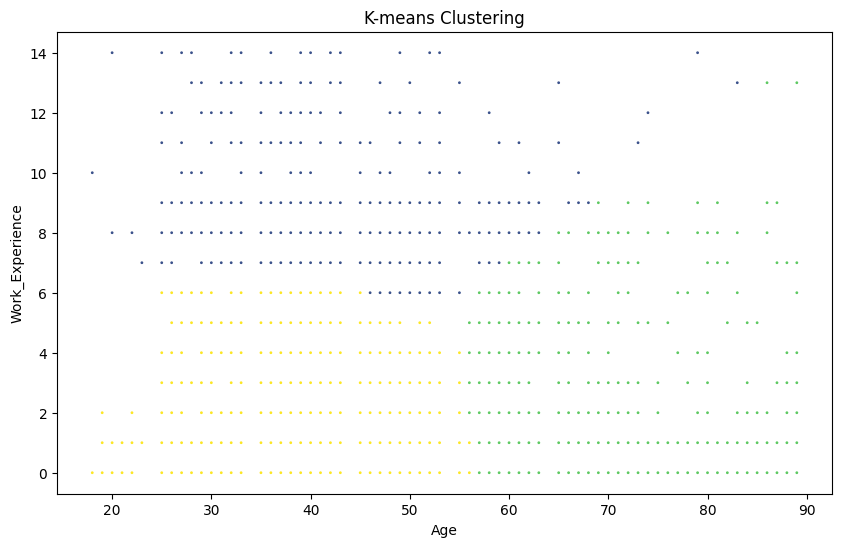

In [389]:
# Visualize and Interpret the Clusters
plt.figure(figsize=(10, 6))
plt.scatter(data3['Age'], data3['Work_Experience'],data3['Ever_Married'], c=data3['Cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Work_Experience')
plt.title('K-means Clustering')